# Feature Transformation
### Outlier Detection
<pre>
    1. Z-score treatment (in case of Normal or almost normal ditribution)
    2. IQR Based filtering (in csae of skewed distribution)
    3. Percentile
    4. Winsorization
</pre>
What to do after detection outlier?
1. Trimming (Removing)
2. Capping 

# 1. Z-score treatment
1. Z-score treatment<br>
    Z-score = (value - average) / Standard Deviation<br>
    Outlier = Any value with an absolute z-score greater than 3<br>

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [91]:
placement_data = pd.read_csv("A:\\py-code\\1 ML\\Feature-Engineering\\placement.csv")
placement_data

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


### Pandas KDE Plot

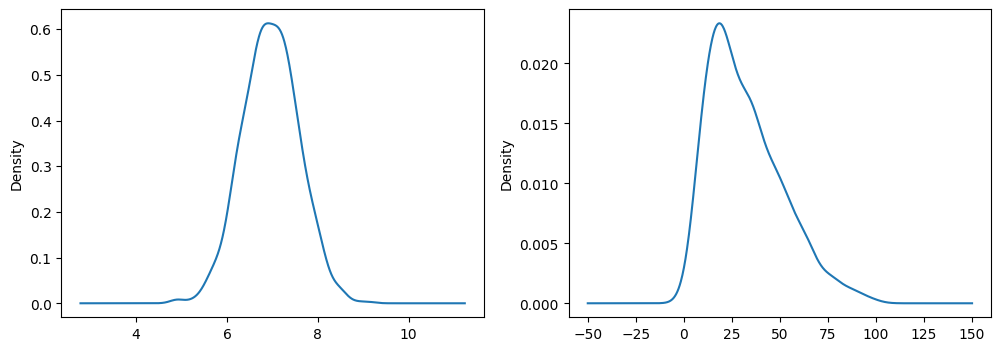

In [92]:
# Step1: Plot the distributions
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,4))
placement_data['cgpa'].plot(kind='kde',ax=ax1,xlabel='CGPA')
placement_data['placement_exam_marks'].plot(kind='kde',ax=ax2,xlabel="Placement Exam Marks")
plt.show() # Optional, but good practice

### Seaborn's KDE Plot

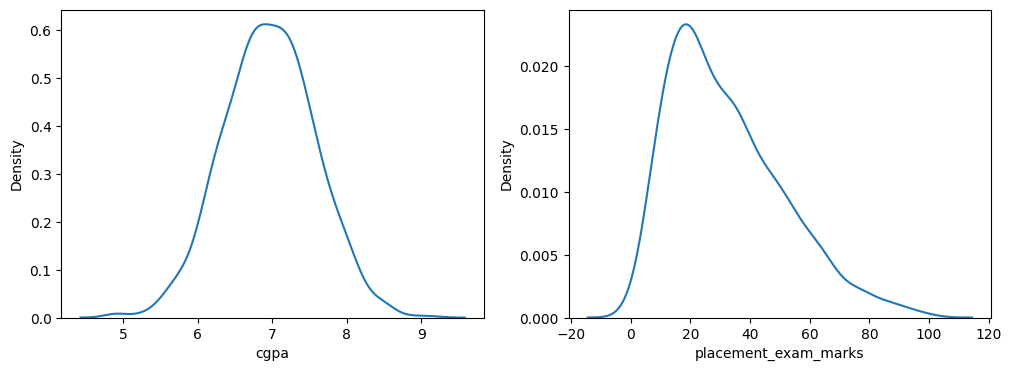

In [93]:
# using seaborn for better visual
fig , (ax1, ax2) = plt.subplots(1,2,figsize=(12,4))
sns.kdeplot(data=placement_data,x='cgpa',ax=ax1)
sns.kdeplot(data=placement_data,x='placement_exam_marks',ax=ax2)
plt.show()

### Seaborn't distplot (going to be deprecated)

C:\Users\PMLS\AppData\Local\Temp\ipykernel_19204\1452018963.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(placement_data['cgpa'],ax=ax1)
C:\Users\PMLS\AppData\Local\Temp\ipykernel_19204\1452018963.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(placement_data['placement_exam_marks'])


<Axes: xlabel='placement_exam_marks', ylabel='Density'>

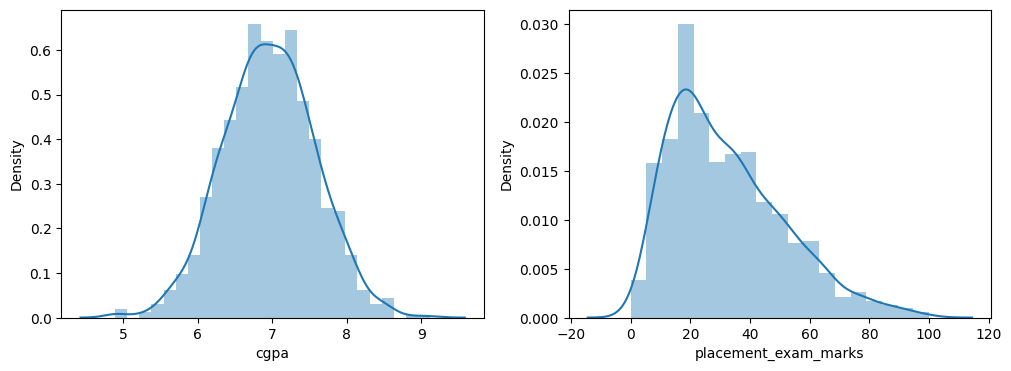

In [94]:
fig , (ax1,ax2) = plt.subplots(1,2,figsize=(12,4))
sns.distplot(placement_data['cgpa'],ax=ax1)
sns.distplot(placement_data['placement_exam_marks'])

### Seaborn's histplot with kde=True

<Axes: xlabel='placement_exam_marks', ylabel='Count'>

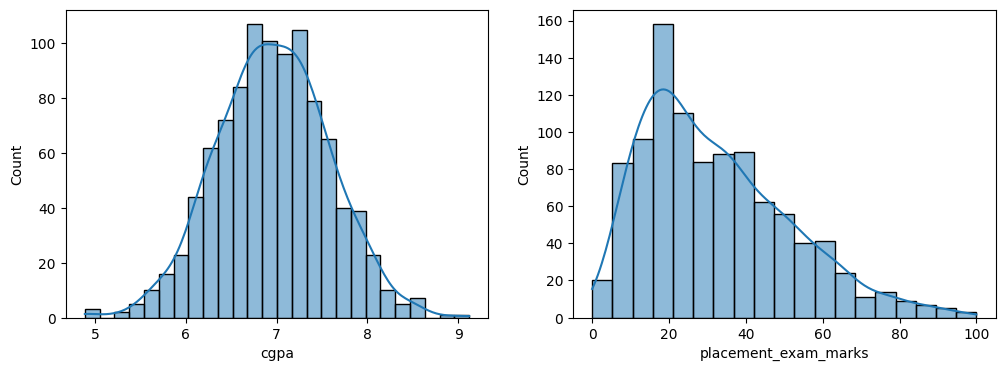

In [95]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,4))
sns.histplot(data=placement_data, x='cgpa',kde=True,ax=ax1)
sns.histplot(data=placement_data, x='placement_exam_marks',kde=True,ax=ax2)

<Axes: xlabel='placement_exam_marks', ylabel='Density'>

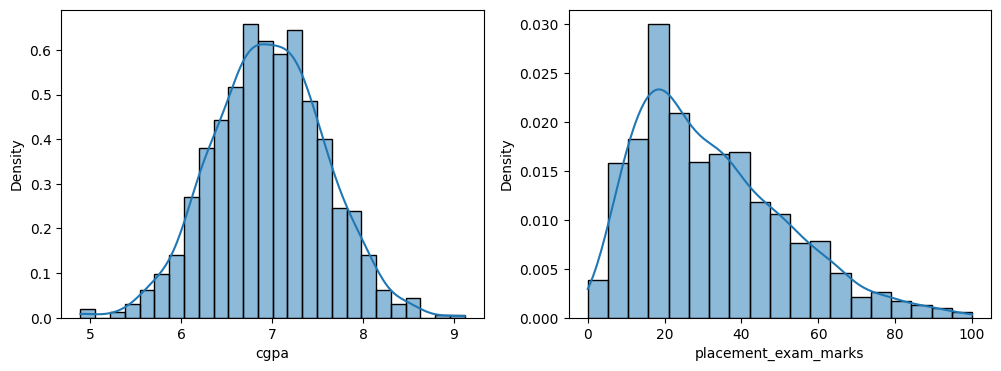

In [96]:
# Have a look on Y-axis
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,4))
sns.histplot(data=placement_data, x='cgpa',kde=True,ax=ax1,stat='density')
sns.histplot(data=placement_data, x='placement_exam_marks',kde=True,ax=ax2,stat='density')

<Axes: xlabel='cgpa', ylabel='Density'>

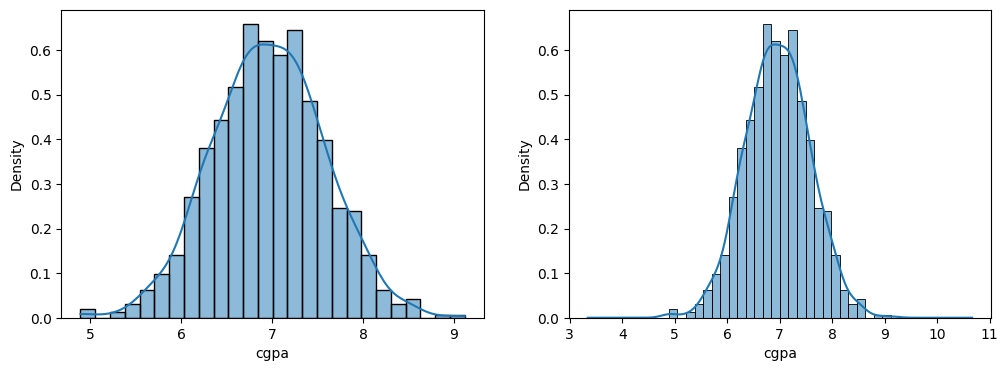

In [97]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,4))
sns.histplot(data=placement_data, x='cgpa',kde=True,ax=ax1,stat='density')
sns.histplot(data=placement_data, x='cgpa',kde=True,ax=ax2,stat='density',kde_kws=dict(cut=10)) #make it thin

<Axes: xlabel='cgpa', ylabel='Density'>

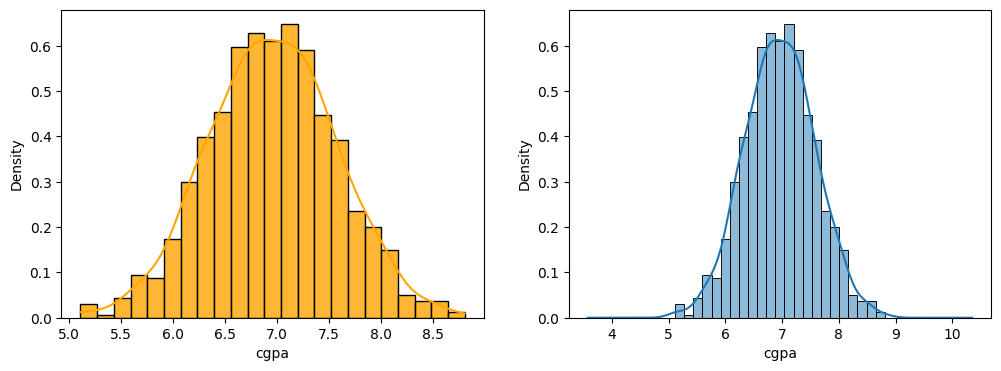

In [125]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,4))
sns.histplot(data=placement_data, x='cgpa',kde=True,ax=ax1,stat='density',alpha=.8,color='#FFA500')
sns.histplot(data=placement_data, x='cgpa',kde=True,ax=ax2,stat='density',kde_kws=dict(cut=10)) #make it thin

<Axes: ylabel='cgpa'>

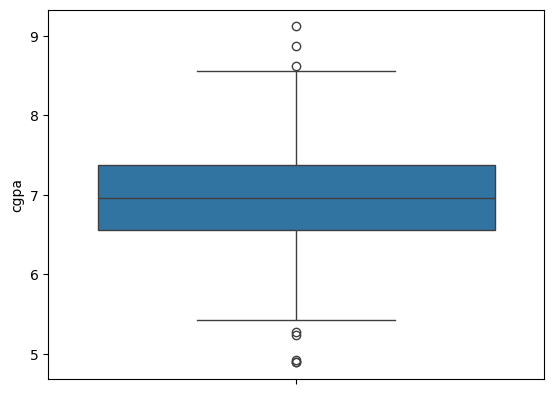

In [99]:
sns.boxplot(data=placement_data, y='cgpa')

CGPA Distribution is normal so we can apply the Z-score treatment.

Values < 3 * Std &  Values > 3 * Std are Outliers 

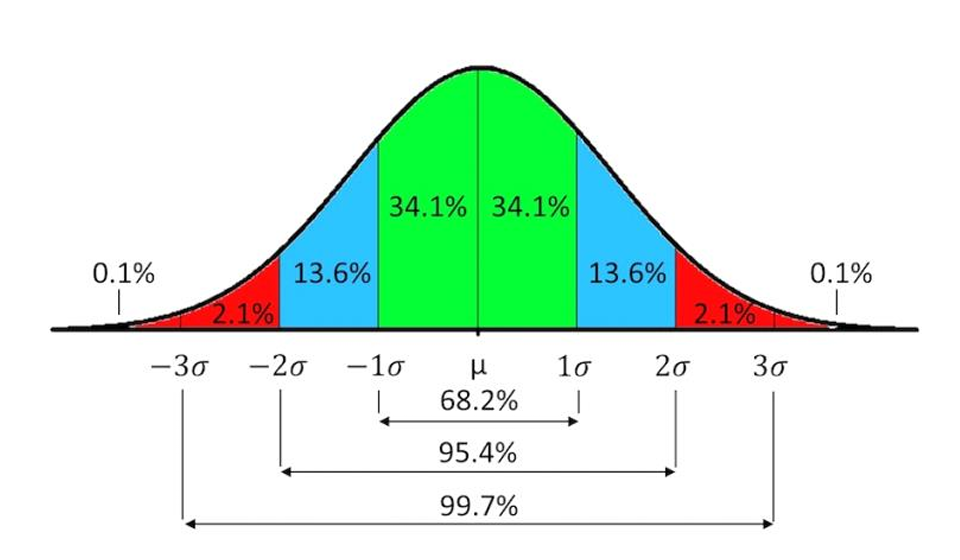

In [100]:
CGPA = placement_data['cgpa']
mean, std, min, max = CGPA.mean(), CGPA.std(),CGPA.min(), CGPA.max()
mean, std, min, max

(6.96124, 0.6158978751323896, 4.89, 9.12)

### Boundary Values: µ ± 3σ

In [101]:
# Finding the boundary values
upper_limit = mean + 3 * std 
lower_limit = mean - 3 * std
upper_limit, lower_limit

(8.808933625397168, 5.113546374602832)

In [102]:
# Finding Outliers
outliers = placement_data[(CGPA > upper_limit) | (CGPA < lower_limit)]
outliers

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


### Solution1: Trimming using boundary values

In [103]:
# Removing five rows
df1 = placement_data[(CGPA< upper_limit) & (CGPA > lower_limit)]
df1

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


### Solution1: Trimming Using z-score 

In [104]:
df2 = placement_data.copy()
df2['cgpa_zscore'] = (CGPA - mean)/std

In [105]:
df2

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
998,8.62,46.0,1,2.693239


In [115]:
# Removing the outliers using z-score
# don't miss the brackets/parentheses

df2[(df2['cgpa_zscore'] < 3) & (df2['cgpa_zscore'] > -3)]

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


### Solution2: Capping
In this case we have 5 outlier the solution is either trim/remove them or fill/cap them. Capping is a process of assigning outliers the boundry values. For example rows having cgpa < lower_limit will be replaced with the lower_limit  and cgpa > upper_limit will be replaced the upper_limit. 

In [116]:
outliers

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [117]:
df3 = placement_data
df3['cgpa']= np.where(
                df3['cgpa']>upper_limit, # 1 If cgpa greater than upper_limt
                upper_limit,                # 2 Assign it upper_limit
                # 3 If less than lower_limit then assign lower_limit, otherwise let it remain same
                np.where(df3['cgpa']<lower_limit, lower_limit,df3['cgpa']) ) 


In [118]:
df3

,cgpa,placement_exam_marks,placed
0,7.190000,26.0,1
1,7.460000,38.0,1
2,7.540000,40.0,1
3,6.420000,8.0,1
4,7.230000,17.0,0
...,...,...,...
995,8.808934,44.0,1
996,8.808934,65.0,1
997,5.113546,34.0,0
998,8.620000,46.0,1


In [122]:
df3['cgpa'].min(), df3['cgpa'].max(),  df2['cgpa'].min()

(5.113546374602832, 8.808933625397168, 4.89)

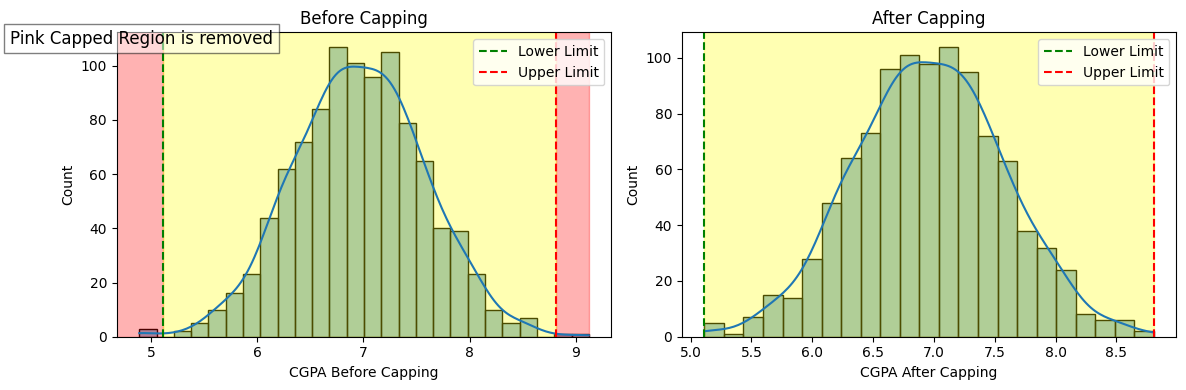

In [172]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plotting on ax1 (first subplot)
ax1.set_title("Before Capping")
ax1.set_xlabel("CGPA Before Capping")
# sns.histplot(data=df2['cgpa'], kde=True, ax=ax1, color='#FFA500', alpha=0.8)
sns.histplot(data=df2['cgpa'], kde=True, ax=ax1)

# Plotting vertical lines on ax1
ax1.axvline(x=lower_limit, color='g', linestyle='--', label='Lower Limit')
ax1.axvline(x=upper_limit, color='r', linestyle='--', label='Upper Limit')
ax1.legend()

# Shade the region between lower_limit and upper_limit on ax1
ax1.axvspan(0, lower_limit, color='red', alpha=0.3)
ax1.axvspan(upper_limit, max, color='red', alpha=0.3)
ax1.axvspan(lower_limit, upper_limit, color='yellow', alpha=0.3)

# Adding a note or annotation to ax1
ax1.text(0.05, 0.95, 'Pink Capped Region is removed', transform=ax1.transAxes,
         verticalalignment='bottom', horizontalalignment='center',
         color='black', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))


# Plotting on ax2 (second subplot)
ax2.set_title("After Capping")
ax2.set_xlabel("CGPA After Capping")
sns.histplot(data=df3['cgpa'], kde=True, ax=ax2)

# Plotting vertical lines on ax2
ax2.axvline(x=lower_limit, color='g', linestyle='--', label='Lower Limit')
ax2.axvline(x=upper_limit, color='r', linestyle='--', label='Upper Limit')
ax2.legend()

# Shade the region between lower_limit and upper_limit on ax2
ax2.axvspan(lower_limit, upper_limit, color='yellow', alpha=0.3)

plt.tight_layout()
plt.show()